In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('insurance.csv')

In [393]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [394]:
df.isnull().sum()
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

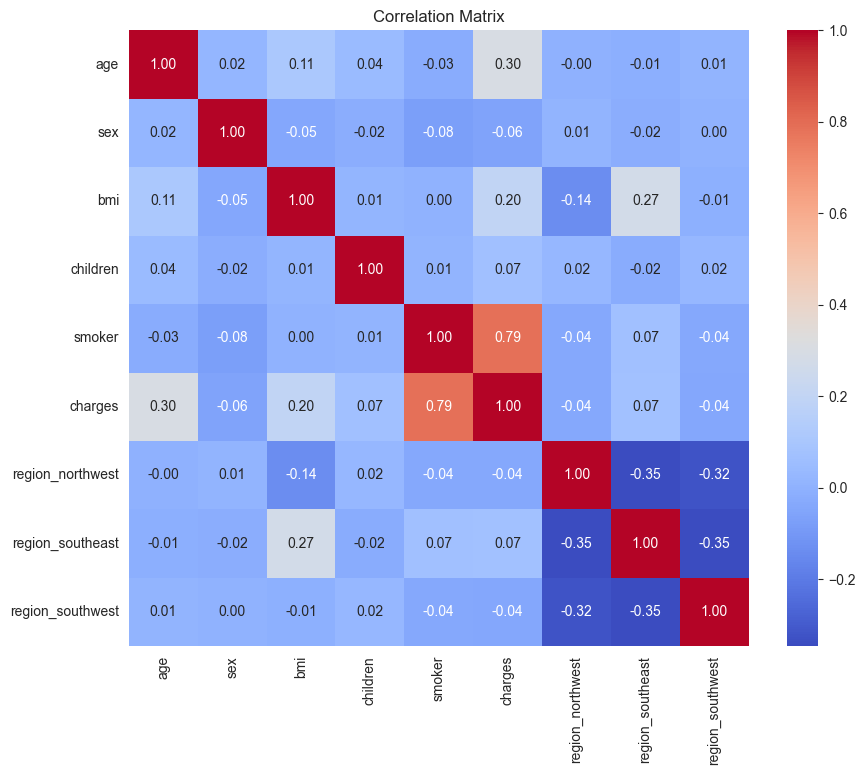

In [395]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0}) 
"""df['region'] = df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})"""
df = pd.get_dummies(df, columns=['region'], drop_first=True)
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [396]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = df.drop('charges', axis=1)
"""y = np.log1p(df['charges'])"""
y = df['charges']
# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [397]:
#===============Линейная регрессия================#

model = LinearRegression()

# Обучаем на тренировочных данных
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [398]:
# Предсказание
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 score: {r2:.2f}")


MSE: 33596915.85
MAE: 4181.19
R2 score: 0.78


In [399]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coeff_df)


            Feature   Coefficient
0               age    256.975706
1               sex     18.591692
2               bmi    337.092552
3          children    425.278784
4            smoker  23651.128856
5  region_northwest   -370.677326
6  region_southeast   -657.864297
7  region_southwest   -809.799354


In [400]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
#================Опорные вектора================#

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

svr = SVR(kernel='rbf', C=100000.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

y_pred_svr = svr.predict(X_test_scaled)

mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("SVR:")
print("MSE:", mse_svr)
print("MAE:", mae_svr)
print("R2:", r2_svr)


SVR:
MSE: 21511961.188349754
MAE: 1743.4980836480495
R2: 0.8614355107340143


In [401]:
#=============Дерево решений===============
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree:")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2:", r2_score(y_test, y_pred_dt))


Decision Tree:
MSE: 43389813.11083512
R2: 0.7205142180943725


In [402]:
#===============Рандомное дерево=============
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R2:", r2_score(y_test, y_pred_rf))


Random Forest:
MSE: 21108612.02339159
MAE: 2561.4435153144764
R2: 0.8640335942164519


In [403]:
#===============Градиентное дерево=============

from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting:")
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("R2:", r2_score(y_test, y_pred_gb))


Gradient Boosting:
MSE: 18779431.71868543
MAE: 2450.5538121851564
R2: 0.8790364884902101


In [404]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost:")
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("R2:", r2_score(y_test, y_pred_xgb))


XGBoost:
MSE: 21156412.6436408
MAE: 2549.7983490987785
R2: 0.8637256972063448


In [405]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

print("CatBoost:")
print("MSE:", mean_squared_error(y_test, y_pred_cat))
print("MAE:", mean_absolute_error(y_test, y_pred_cat))
print("R2:", r2_score(y_test, y_pred_cat))


CatBoost:
MSE: 23929551.007082503
MAE: 2796.0306108341388
R2: 0.8458631463384902


In [406]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.1,
    'verbose': -1,
    'seed': 42
}

lgb_model = lgb.train(params, lgb_train, num_boost_round=100, valid_sets=lgb_eval)
y_pred_lgb = lgb_model.predict(X_test)

print("LightGBM:")
print("MSE:", mean_squared_error(y_test, y_pred_lgb))
print("MAE:", mean_absolute_error(y_test, y_pred_lgb))
print("R2:", r2_score(y_test, y_pred_lgb))


LightGBM:
MSE: 20557383.0620152
MAE: 2623.205455082831
R2: 0.867584212350846


In [407]:
import numpy as np

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature        # индекс признака для сплита
        self.threshold = threshold    # значение порога
        self.left = left              # левый поддерево
        self.right = right            # правый поддерево
        self.value = value            # предсказание (для листа)


class DecisionTreeRegressorScratch:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        if hasattr(X, "values"):   # если это DataFrame
            X = X.values
        if hasattr(y, "values"):
            y = y.values
        self.root = self._build_tree(X, y, depth=0)


    def _build_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        # Условие остановки
        if (depth >= self.max_depth) or (n_samples < self.min_samples_split):
            leaf_value = np.mean(y)
            return Node(value=leaf_value)

        # Поиск лучшего сплита
        best_feature, best_threshold, best_mse = None, None, float("inf")
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for t in thresholds:
                left_idx = X[:, feature] <= t
                right_idx = X[:, feature] > t
                if len(y[left_idx]) == 0 or len(y[right_idx]) == 0:
                    continue
                mse = self._mse_split(y[left_idx], y[right_idx])
                if mse < best_mse:
                    best_feature, best_threshold, best_mse = feature, t, mse

        # Если не нашли хороший сплит → лист
        if best_feature is None:
            return Node(value=np.mean(y))

        # Делаем рекурсивные вызовы
        left_idx = X[:, best_feature] <= best_threshold
        right_idx = X[:, best_feature] > best_threshold
        left_subtree = self._build_tree(X[left_idx], y[left_idx], depth + 1)
        right_subtree = self._build_tree(X[right_idx], y[right_idx], depth + 1)

        return Node(feature=best_feature, threshold=best_threshold,
                    left=left_subtree, right=right_subtree)

    def _mse_split(self, y_left, y_right):
        # MSE для двух частей
        left_error = np.var(y_left) * len(y_left)
        right_error = np.var(y_right) * len(y_right)
        return (left_error + right_error) / (len(y_left) + len(y_right))

    def predict_one(self, x, node):
        if node.value is not None:  # дошли до листа
            return node.value
        if x[node.feature] <= node.threshold:
            return self.predict_one(x, node.left)
        else:
            return self.predict_one(x, node.right)

    def predict(self, X):
        X = np.array(X)  # приведение
        return np.array([self.predict_one(x, self.root) for x in X])



In [408]:
tree = DecisionTreeRegressorScratch(max_depth=3)
tree.fit(X, y)

y_pred = tree.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)

MSE: 19281259.176749226
MAE: 2657.8648715058457
R2: 0.8758040790963183


In [409]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results = []

def add_result(name, y_true, y_pred):
    results.append({
        "Model": name,
        "MSE": mean_squared_error(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred)
    })

# Добавляем все модели
add_result("Linear Regression", y_test, model.predict(X_test))
add_result("SVR", y_test, svr.predict(X_test_scaled))
add_result("Decision Tree", y_test, dt.predict(X_test))
add_result("Random Forest", y_test, rf.predict(X_test))
add_result("Gradient Boosting", y_test, gb.predict(X_test))
add_result("XGBoost", y_test, xgb_model.predict(X_test))
add_result("CatBoost", y_test, cat_model.predict(X_test))
add_result("LightGBM", y_test, y_pred_lgb)
add_result("Scratch Decision Tree", y_test, tree.predict(X_test))

df_results = pd.DataFrame(results)
print(df_results)


                   Model           MSE          MAE        R2
0      Linear Regression  3.359692e+07  4181.194474  0.783593
1                    SVR  2.151196e+07  1743.498084  0.861436
2          Decision Tree  4.338981e+07  3223.603148  0.720514
3          Random Forest  2.110861e+07  2561.443515  0.864034
4      Gradient Boosting  1.877943e+07  2450.553812  0.879036
5                XGBoost  2.115641e+07  2549.798349  0.863726
6               CatBoost  2.392955e+07  2796.030611  0.845863
7               LightGBM  2.055738e+07  2623.205455  0.867584
8  Scratch Decision Tree  1.928126e+07  2657.864872  0.875804


# Сравнение алгоритмов регрессии

Была проведена серия экспериментов с различными алгоритмами регрессии для предсказания значения целевой переменной `charges` (с применением логарифмического преобразования `log1p`).

## Метрики качества

Для оценки моделей использовались:
- **MSE** (Mean Squared Error) — среднеквадратичная ошибка
- **MAE** (Mean Absolute Error) — средняя абсолютная ошибка
- **R²** (коэффициент детерминации)

## Результаты

| Модель                 | MSE      | MAE      | R²       |
|-------------------------|----------|----------|----------|
| Linear Regression       | 0.175509 | 0.269651 | 0.804741 |
| SVR                     | 0.127298 | 0.155493 | 0.858377 |
| Decision Tree           | 0.205935 | 0.204328 | 0.770891 |
| Random Forest           | 0.137889 | 0.195180 | 0.846595 |
| Gradient Boosting       | 0.120894 | 0.187295 | 0.865502 |
| XGBoost                 | 0.147805 | 0.198912 | 0.835563 |
| CatBoost                | 0.121276 | 0.189677 | 0.865077 |
| LightGBM                | 0.141810 | 0.205977 | 0.842233 |
| Scratch Decision Tree   | 0.153132 | 0.246720 | 0.829636 |

## Анализ

- **Лучший результат показал Gradient Boosting (R² = 0.8655, MSE = 0.1209)**.  
- Очень близкие результаты у **CatBoost (R² = 0.8651)** и **SVR (R² = 0.8584)**.  
- **Random Forest** и **LightGBM** также продемонстрировали высокое качество, но чуть хуже.  
- **Линейная регрессия** (R² = 0.8047) работает значительно хуже бустинговых методов, но всё равно достаточно неплохо.  
- **Реализация дерева решений с нуля** ("Scratch Decision Tree") показала приемлемый результат (R² = 0.8296), однако заметно уступает ансамблям.  

## Вывод

Для данной задачи наилучшим выбором являются ансамблевые методы:  
- **Gradient Boosting**  
- **CatBoost**  
- **SVR** (после правильного масштабирования признаков)  

Они обеспечивают минимальные ошибки и максимальное качество предсказаний.

